<a href="https://colab.research.google.com/github/ShreyaMandot/Bigdata/blob/main/EDA_BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openjdk-8-jdk-headless

In [ ]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz


--2022-05-10 08:19:55--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  2.78MB/s    in 93s     

2022-05-10 08:21:28 (2.80 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



In [ ]:
!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [ ]:
import pyspark
import numpy as np
import pandas as pd

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master('local[*]').appName('BIG DATA').getOrCreate()

# Read data from CSV file
#you can download it from here: https://raw.githubusercontent.com/besherh/BigDataManagement/main/SparkCSV/flights-larger.csv
game_df = spark.read.csv('./ad-clicks.csv', sep=',', header=True, inferSchema=True, nullValue='NA')

game_df.show(5)

+-------------------+----+-------------+------+------+----+-----------+
|          timestamp|txId|userSessionId|teamId|userId|adId| adCategory|
+-------------------+----+-------------+------+------+----+-----------+
|2016-05-26 15:13:22|5974|         5809|    27|   611|   2|electronics|
|2016-05-26 15:17:24|5976|         5705|    18|  1874|  21|     movies|
|2016-05-26 15:22:52|5978|         5791|    53|  2139|  25|  computers|
|2016-05-26 15:22:57|5973|         5756|    63|   212|  10|    fashion|
|2016-05-26 15:22:58|5980|         5920|     9|  1027|  20|   clothing|
+-------------------+----+-------------+------+------+----+-----------+
only showing top 5 rows



In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark


In [ ]:
df = spark.read.csv("/content/buy-clicks.csv", header=True, inferSchema=True)

In [ ]:
df.show(5)

+-------------------+----+-------------+----+------+-----+-----+
|          timestamp|txId|userSessionId|team|userId|buyId|price|
+-------------------+----+-------------+----+------+-----+-----+
|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|
|2016-05-26 15:36:54|6005|         5775|  35|   868|    4| 10.0|
|2016-05-26 15:36:54|6006|         5679|  97|   819|    5| 20.0|
|2016-05-26 16:36:54|6067|         5665|  18|   121|    2|  3.0|
|2016-05-26 17:06:54|6093|         5709|  11|  2222|    5| 20.0|
+-------------------+----+-------------+----+------+-----+-----+
only showing top 5 rows



In [ ]:
df2 = (df.groupBy("buyId").sum("price").show(truncate=False))

+-----+----------+
|buyId|sum(price)|
+-----+----------+
|1    |538.0     |
|3    |1685.0    |
|5    |12200.0   |
|4    |4250.0    |
|2    |2142.0    |
|0    |592.0     |
+-----+----------+



showing a histogram of how much money was made
from each item.

In [ ]:
df2 = df.groupBy("buyId").agg({"price": "sum"})
df2.show()

+-----+----------+
|buyId|sum(price)|
+-----+----------+
|    1|     538.0|
|    3|    1685.0|
|    5|   12200.0|
|    4|    4250.0|
|    2|    2142.0|
|    0|     592.0|
+-----+----------+



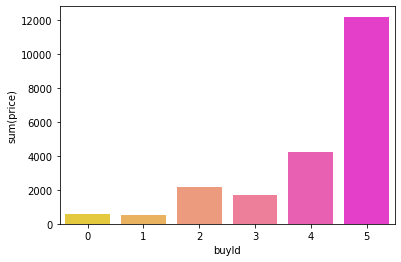

In [ ]:
df3 = df2.toPandas()
#df3.plot.bar(x='buyId', y='sum(price)',color='teal',rot=0, subplots=True)
sns.barplot(x='buyId', y='sum(price)',data=df3,palette='spring_r')

No. of times each item was purchased

+-----+-----+
|buyId|count|
+-----+-----+
|    1|  269|
|    3|  337|
|    5|  610|
|    4|  425|
|    2|  714|
|    0|  592|
+-----+-----+



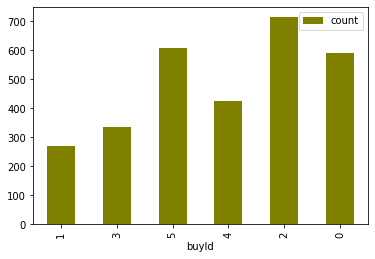

In [ ]:
newdf1 = df.groupBy("buyId").count().select('buyId', f.col('count'))
newdf1.show()
newdf1.toPandas().plot.bar(x='buyId', y='count', color='olive')

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions
from pyspark.sql.functions import sum
df.createOrReplaceTempView("buy")
spark.sql("select * from buy").show()
#spark.sql("select userId, price from buy order by price").show()
          

+-------------------+----+-------------+----+------+-----+-----+
|          timestamp|txId|userSessionId|team|userId|buyId|price|
+-------------------+----+-------------+----+------+-----+-----+
|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|
|2016-05-26 15:36:54|6005|         5775|  35|   868|    4| 10.0|
|2016-05-26 15:36:54|6006|         5679|  97|   819|    5| 20.0|
|2016-05-26 16:36:54|6067|         5665|  18|   121|    2|  3.0|
|2016-05-26 17:06:54|6093|         5709|  11|  2222|    5| 20.0|
|2016-05-26 17:06:54|6094|         5798|  77|  1304|    5| 20.0|
|2016-05-26 18:06:54|6155|         5920|   9|  1027|    5| 20.0|
|2016-05-26 18:06:54|6156|         5697|  35|  2199|    2|  3.0|
|2016-05-26 18:36:54|6183|         5893|  64|  1544|    5| 20.0|
|2016-05-26 18:36:54|6184|         5697|  35|  2199|    1|  2.0|
|2016-05-26 19:36:54|6243|         5659|  13|  1623|    4| 10.0|
|2016-05-26 19:36:54|6244|         5920|   9|  1027|    3|  5.0|
|2016-05-26 20:06:54|6269

showing a histogram of total amount of money spent by
the top ten users (Ranked by how much they spent).

In [ ]:
from pyspark.sql.functions import sum, col, desc
totaldf = df.groupBy("userId") \
  .agg(sum("price").alias("sum_price")) \
  .sort(desc("sum_price")).limit(10)
totaldf.show()

+------+---------+
|userId|sum_price|
+------+---------+
|  2229|    223.0|
|    12|    215.0|
|   471|    202.0|
|   511|    200.0|
|  1027|    189.0|
|  1260|    183.0|
|   670|    183.0|
|   352|    180.0|
|  1697|    172.0|
|  1732|    172.0|
+------+---------+



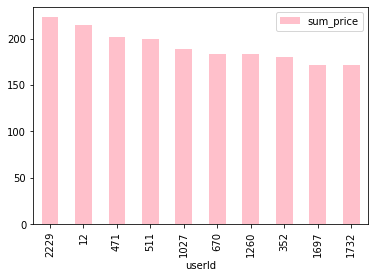

In [ ]:
totaldf.toPandas().plot.bar(x='userId', y='sum_price', color='pink')

A histogram showing how many times each category of advertisement was
clicked-on:

+-----------+-----+
| adCategory|count|
+-----------+-----+
| automotive|  566|
|  computers| 2638|
|      games| 2601|
|     movies| 1692|
|electronics| 1097|
|     sports| 2074|
|   clothing| 2340|
|   hardware| 1588|
|    fashion| 1727|
+-----------+-----+



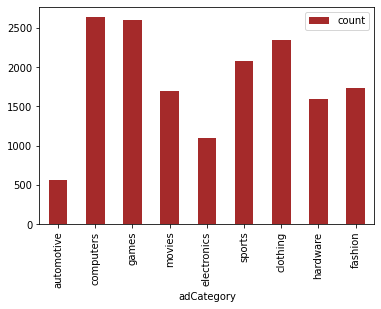

In [ ]:
import pyspark.sql.functions as f
newdf = game_df.groupBy("adCategory").count().select('adCategory', f.col('count'))

newdf.show()

newdf.toPandas().plot.bar(x='adCategory', y='count',color='brown')

In [ ]:
combined_df = spark.read.csv('./combined-data.csv', sep=',', header=True, inferSchema=True, nullValue='NA')

combined_df.show(5)

userid_drop_column = combined_df.drop('userSessionId')
userid_drop_column.show(5)


+------+-------------+---------+------------+----------------+----------+-----------+---------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|
|  1658|         5649|        1|      iphone|              31|         5|       NULL|     NULL|
|  1589|         5650|        1|      iphone|              26|         2|       NULL|     NULL|
|  1863|         5651|        1|     android|              35|         4|       NULL|     NULL|
|   937|         5652|        1|     android|              39|         0|          1|     1.00|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
only showing top 5 rows

+------+---------+------------+----------------+----------+-----------+---------+
|userId|teamLevel|platformTyp

In [ ]:
from pyspark.sql.types import StringType, BooleanType, IntegerType
course_df3 = userid_drop_column \
  .withColumn("avg_price" ,
              userid_drop_column["avg_price"]
              .cast(IntegerType()))   \
  .withColumn("count_buyId",
              userid_drop_column["count_buyId"]
              .cast(IntegerType()))  
  
course_df3.printSchema()
course_df3.show()

root
 |-- userId: integer (nullable = true)
 |-- teamLevel: integer (nullable = true)
 |-- platformType: string (nullable = true)
 |-- count_gameclicks: integer (nullable = true)
 |-- count_hits: integer (nullable = true)
 |-- count_buyId: integer (nullable = true)
 |-- avg_price: integer (nullable = true)

+------+---------+------------+----------------+----------+-----------+---------+
|userId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|
+------+---------+------------+----------------+----------+-----------+---------+
|   812|        1|     android|              69|         8|       null|     null|
|  1658|        1|      iphone|              31|         5|       null|     null|
|  1589|        1|      iphone|              26|         2|       null|     null|
|  1863|        1|     android|              35|         4|       null|     null|
|   937|        1|     android|              39|         0|          1|        1|
|   342|        1|     android|    

+------------+-----+
|platformType|count|
+------------+-----+
|      iphone| 1934|
|     android| 1635|
|       linux|  252|
|         mac|  179|
|     windows|  619|
+------------+-----+



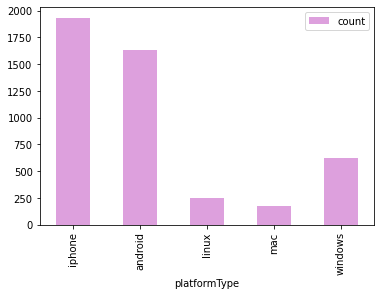

In [ ]:
df3=course_df3.groupBy(['platformType']).count()
df3.show()
df3.toPandas().plot.bar(x='platformType', y='count', color='plum')


In [ ]:
!pip install gmplot

     |████████████████████████████████| 164 kB 5.3 MB/s 


In [ ]:
!pip install gmplot

     |████████████████████████████████| 164 kB 7.4 MB/s 


In [ ]:

import numpy as np
import pandas as pd
import geopy
from geopy.geocoders import Nominatim
import gmplot
import webbrowser


# Read data from CSV file
#you can download it from here: https://raw.githubusercontent.com/besherh/BigDataManagement/main/SparkCSV/flights-larger.csv
User_df = pd.read_csv(r'./users.csv')

User_df.head(5)

User_df=User_df.dropna()

geolocator=Nominatim(user_agent="geo")
def geolocate(country):
     try:
         loc=geolocator.geocode(country)
         return(loc.latitude,loc.longitude)
     except:
         return np.nan
    
location_test=[]
for i in User_df['country']:
    location_test.append(geolocate(i))
    
location_test=[x for x in location_test if pd.isnull(x) == False]
 #print(location_test)
location_test=pd.DataFrame(location_test,columns=["Latitude","Longitude"])
 #location_test=location_test.dropna()
Lat=location_test['Latitude']
Long=location_test['Longitude']
map_plot=gmplot.GoogleMapPlotter(53.81604806664296, -3.0548307614209813,3)
map_plot.heatmap(Lat,Long)
map_plot.draw("test.html")
webbrowser.open_new_tab("test.html")

False